In [1]:
from igraph import *

# Create a graph

In [7]:
g = Graph()
g.add_vertices(3)
g.add_edges([(0,1), (1,2), (2,0)])
print(g)

IGRAPH U--- 3 3 --
+ edges:
0--1 1--2 0--2


I can also generate a graph using some graph generator:

In [6]:
tree = Graph.Tree(127, 2)
tree.summary()

'IGRAPH U--- 127 126 -- '

# Setting vertex and edge attributes

In [8]:
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [13]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f6658b32a50>, 0, {'name': 'Alice', 'age': 25, 'gender': 'f'}),
 igraph.Vertex(<igraph.Graph object at 0x7f6658b32a50>, 1, {'name': 'Bob', 'age': 31, 'gender': 'm'}),
 igraph.Vertex(<igraph.Graph object at 0x7f6658b32a50>, 2, {'name': 'Claire', 'age': 18, 'gender': 'f'}),
 igraph.Vertex(<igraph.Graph object at 0x7f6658b32a50>, 3, {'name': 'Dennis', 'age': 47, 'gender': 'm'}),
 igraph.Vertex(<igraph.Graph object at 0x7f6658b32a50>, 4, {'name': 'Esther', 'age': 22, 'gender': 'f'}),
 igraph.Vertex(<igraph.Graph object at 0x7f6658b32a50>, 5, {'name': 'Frank', 'age': 23, 'gender': 'm'}),
 igraph.Vertex(<igraph.Graph object at 0x7f6658b32a50>, 6, {'name': 'George', 'age': 50, 'gender': 'm'})]

In [14]:
list(g.es)

[igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 0, {'is_formal': False}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 1, {'is_formal': False}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 2, {'is_formal': True}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 3, {'is_formal': True}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 4, {'is_formal': True}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 5, {'is_formal': False}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 6, {'is_formal': True}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 7, {'is_formal': False}),
 igraph.Edge(<igraph.Graph object at 0x7f6658b32a50>, 8, {'is_formal': False})]

In [18]:
print(g.es[0]['is_formal'])
print(g.vs[3]['name'])

False
Dennis


# I can print out a degree of a graph

In [20]:
print(g.degree())
print(g.degree(6))
print(g.degree([2,3,4]))

[3, 1, 4, 3, 2, 3, 2]
2
[4, 3, 2]


# Queries

In [30]:
print(g.vs.select(_degree = g.maxdegree())['name'])
print(g.vs.select(_degree = 1)['name'])
print(g.vs.select(age_gt = 30)['name'])

['Claire']
['Bob']
['Bob', 'Dennis', 'George']


# Other properties

In [26]:
g.mincut()

Cut(<igraph.Graph object at 0x7f6658b32a50>, 1.0, [0], [1])

In [27]:
f = Graph.Full(5)
f.mincut()

Cut(<igraph.Graph object at 0x7f6658b32d50>, 4.0, [0, 4, 5, 6], [1])

In [34]:
g.get_vertex_dataframe()

,name,age,gender
vertex ID,,,
0,Alice,25,f
1,Bob,31,m
2,Claire,18,f
3,Dennis,47,m
4,Esther,22,f
5,Frank,23,m
6,George,50,m


In [31]:
print('K5:')
print(f.get_adjacency())
print()
print('The network')
print(g.get_adjacency())

K5:
[[0, 1, 1, 1, 1]
 [1, 0, 1, 1, 1]
 [1, 1, 0, 1, 1]
 [1, 1, 1, 0, 1]
 [1, 1, 1, 1, 0]]

The network
[[0, 1, 1, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 1, 1, 0]
 [0, 0, 1, 0, 1, 0, 1]
 [0, 0, 1, 1, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 1, 0, 1, 0]]


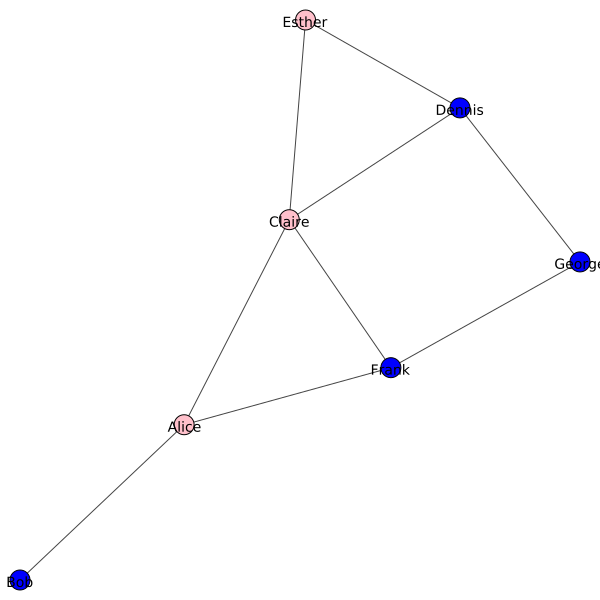

In [41]:
layout = g.layout('fr')
plot(g, layout=layout)

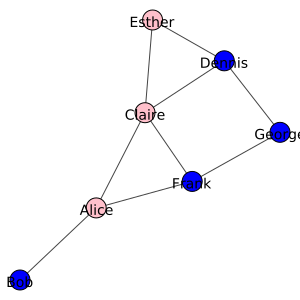

In [42]:
g.vs["label"] = g.vs["name"]
color_dict = {"m": "blue", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
plot(g, layout = layout, bbox = (300, 300), margin = 20)

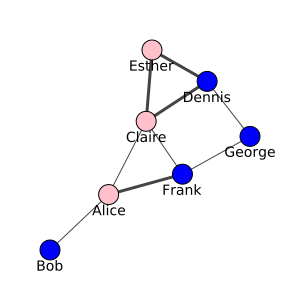

In [49]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 50
visual_style["inline"] = True
visual_style["vertex_label_dist"] = 1
plot(g, **visual_style)

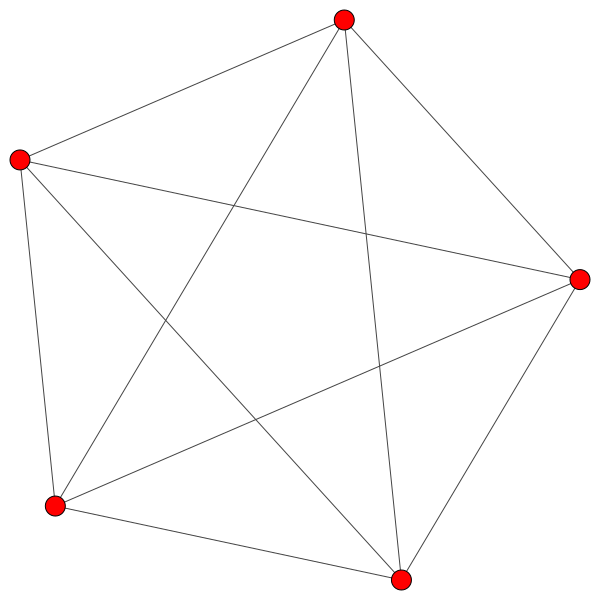

In [51]:
layout = f.layout('kk')
plot(f, layout=layout)

In [52]:
g.summary(verbosity=1)

'IGRAPH UN-- 7 9 -- \n+ attr: age (v), color (v), gender (v), label (v), name (v), is_formal (e)\n+ edges (vertex names):\n Alice -- Bob, Claire, Frank\n   Bob -- Alice\nClaire -- Alice, Dennis, Esther, Frank\nDennis -- Claire, Esther, George\nEsther -- Claire, Dennis\n Frank -- Alice, Claire, George\nGeorge -- Dennis, Frank'

# Let's test out creating a Graph from dataframe

In [53]:
import pandas as pd
data = {'name': ['Alice', 'Bob', 'Cecile', 'David'], 
        'sex': ['f', 'm', 'f', 'm'], 
        'age': [19, 42, 31, 24]}
df = pd.DataFrame(data)
df

,name,sex,age
0,Alice,f,19
1,Bob,m,42
2,Cecile,f,31
3,David,m,24


In [62]:
tuples = [tuple(x) for x in df.values]
Gm = Graph.TupleList(tuples, directed = False, edge_attrs = ['sex'])

In [63]:
print(Gm)
print(Gm.get_edgelist())

IGRAPH UN-- 6 4 --
+ attr: name (v), sex (e)
+ edges (vertex names):
Alice--f, Bob--m, f--Cecile, m--David
[(0, 1), (2, 3), (1, 4), (3, 5)]


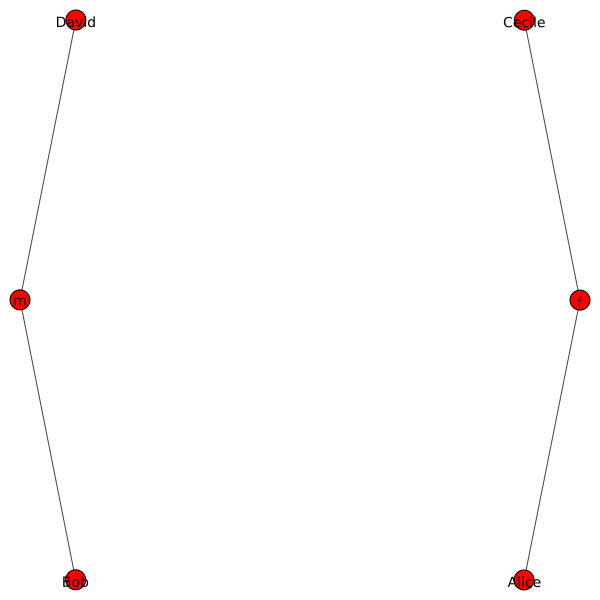

In [68]:
layout = Gm.layout('kk')
visual_style = {}
visual_style['vertex_label'] = Gm.vs['name']
visual_style['layout'] = layout
plot(Gm, **visual_style)